<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/ANOVA_and_model_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분산 분석과 모형 성능

## 분산 분석
- 종속변수의 분산과 독립변수의 분산 간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법
- 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용
- 독립 변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [3]:
# 분산분석과 관련된 속성값
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS =  102754.33755137534
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922585


In [4]:
## TSS = ESS + RSS의 관계가 성립함을 알 수 있다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

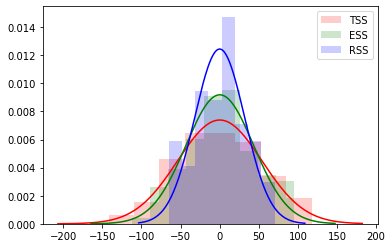

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

sns.distplot(y,
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"},
             label="TSS")
sns.distplot(result.fittedvalues,
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"},
             label="ESS")
sns.distplot(result.resid,
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"},
             label="RSS")
plt.legend()
plt.show()

# 결정계수
- R^2 = 0: 오차의 분산 RSS가 최대, 회귀분석 예측값의 분산 ESS가 0인 경우 --> 회귀분석 결과가 아무런 의미가 없다
- R^2 = 1: 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우 --> 회귀분석 결과가 완벽하다

#### 따라서, 결정계수값은 **회귀분석의 성능을 나타내는 수치**라고 할 수 있다.

# 분산 분석표에서의 N과 K의 의미
- N: 데이터의 갯수
- K: 모수의 갯수

# 회귀 분석 F-검정과 분산 분석의 관계

In [6]:
import statsmodels.api as sm

In [7]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.60e-24
Time:                        14:13:05   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

# 결정계수와 상관계수
- y와 y^의 샘플 상관계수 r의 제곱은 결정 계수 R^2와 같다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


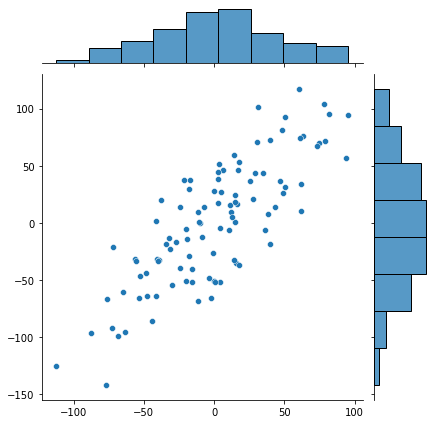

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(result.fittedvalues, y)
plt.show()

# 상수항이 없는 모형의 경우
- 실제 샘플평균과 상관없이 y¯= 이라는 가정하에 TSS를 계산 <-- 이렇게 정의하지 않으면 TSS = RSS + ESS 관계식이 성립하지 않아서 결정계수의 값이 1보다 커지게 됨

#### 따라서 모형의 결정계수를 비교할 때 상수항이 없는 모형과 있는 모형을 직접 비교해서는 안된다.

In [10]:
import pandas as pd
import statsmodels.api as sm

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [11]:
result2.rsquared

0.1876872470594393

# F 검정을 이용한 모형 비교
- 전체 모형(Full Model) $$y=w0+w1x1+w2x2+w3x3$$

- 축소 모형(Reduced Model) $$y=w0+w1x1$$

In [12]:
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm

In [13]:
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


# F 검정을 사용한 변수 중요도 비교
- F검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. --> 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교 ==> 간접적으로 각 독립 변수의 영향력을 측정하는 것과 동일

- ex. 보스턴 집값데이터에서 CRIM이란 변수를 뺀 모델과 전체 모델의 비교하는 검정을 하면 이 검정 결과는 CRIM변수의 중요도를 나타냄

In [15]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


In [16]:
## anova_lm 명령에서는 typ 인수를 2로 지정하면 하나 하나의 변수를 뺀 축소 모형에서의 F 검정값을 한꺼번에 계산 rksmd

model_boston = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12


## 조정 결정 계수
- 선형 회귀 모형에서 독립변수가 추가되면 결정계수의 값은 항상 증가
- 종속 변수 y를 회귀분석하기 위한 기존의 독립변수가 X이고 추가적인 독립변수 z가 성립된 경우 $$R2Xz=R2X+(1−R2X)r∗2yz$$ 의 관계가 성립
> $$R2X$$ 기존의 독립 변수 X를 사용한 경우의 결정 계수   
> $$R2Xz$$ 기존의 독립 변수 X와 추가적인 독립 변수 z를 모두 사용한 경우의 결정 계수   
> $$r∗2yz$$ 추가적인 독립 변수 z와 종속 변수 y간의 상관 관계 계수

- 이러한 독립 변수의 추가효과를 상쇄시키기 위해 독립 변수의 갯수 K에 따라 결정 계수의 값을 조정하는 것이 조정 결정 계수

> $$R2adj=1−n−1n−K(1−R2)=(n−1)R2+1−Kn−K$$

## 정보량 규준
- 최대 우도에 독립 변수의 갯수에 대한 손실분을 반영하는 조정 결정 계수와 함께 많이 쓰이는 모형 비교 기준
- 손실 가중치의 계산 법에 따라 AIC와 BIC 두 가지 사용
> AIC : 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하기 위한 시도에서 생성 --> $$AIC=−2logL+2K$$
> BIC : 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형의 likelihood를 측정하기 위한 값에서 유도 --> $$BIC=−2logL+Klogn$$
> 둘 다 값이 작을수록 올바른 모형에 가까움